# Week 3 

## Univariate Visual Analysis

In [2]:
# Loading Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Updated_Indian_Kids_ScreenTime.csv')
sns.set_style('whitegrid')
df.head()

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Age_Band,Health_Category,Device_Category,Screen_Size,Concern_Level
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,Teenagers,Physical Impact,Portable,"<30""",Attention Needed
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,Pre-teen,Physical Impact,Portable,"<30""",Attention Needed
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,Late-teens,Physical Impact,Wall-mounted,">=30""",Attention Needed
3,15,Female,1.21,Laptop,False,0.39,No Health Impact,Urban,Teenagers,No Health Impact,Portable,"<30""",No Harm
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,Pre-teen,"Physical, Mental Impact",Portable,"<30""",Attention Needed


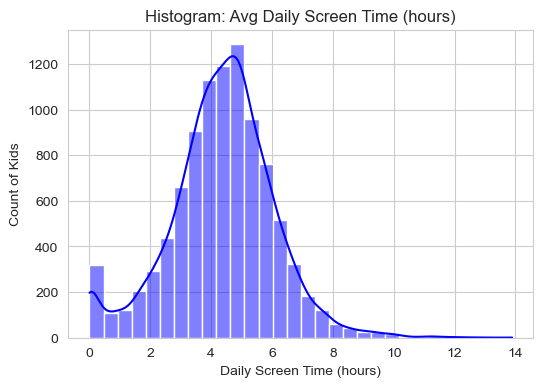

In [6]:
# Univariate Visual Analysis for Distributions of daily hours (Avg_Daily_Screen_Time_hr)(Histogram)
plt.figure(figsize=(6,4))
sns.histplot(df['Avg_Daily_Screen_Time_hr'], bins=30, kde=True, color='blue')
plt.title('Histogram: Avg Daily Screen Time (hours)')
plt.xlabel('Daily Screen Time (hours)')
plt.ylabel('Count of Kids')
plt.show()

### Insights:

1. Most kids spends well above the recommended 2 hr/day limit, typical usage is 4-6 hour
2. Very rare cases of usage 8-12 hours/day.

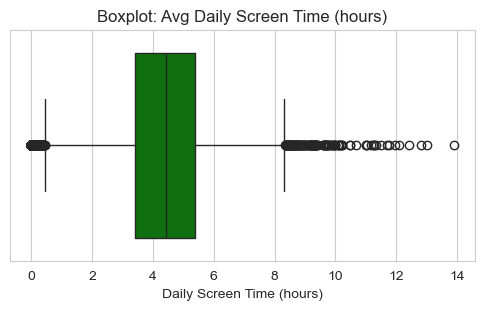

In [8]:
# Univariate Visual Analysis for Distributions of daily hours (Avg_Daily_Screen_Time_hr)(Boxplot)
plt.figure(figsize=(6,3))
sns.boxplot(x=df['Avg_Daily_Screen_Time_hr'], color='green')
plt.title('Boxplot: Avg Daily Screen Time (hours)')
plt.xlabel('Daily Screen Time (hours)')
plt.show()

### Insights:

1. 25% of kids use<=3.4 hours/day
2. 75% of kids use<= 5.4 hours/day
3. Some extreme users are there with 10-12 hours/day these need attention as they may be at higher risk of health.

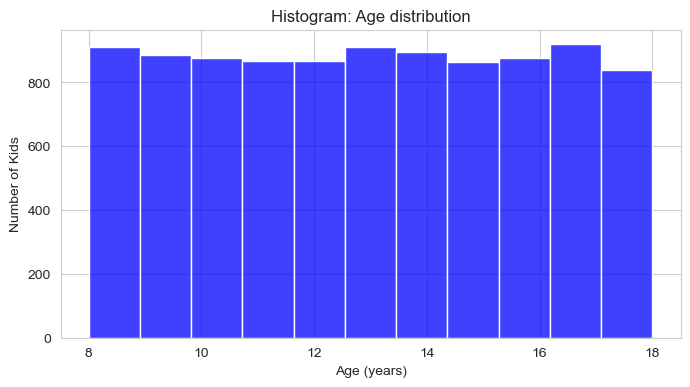

In [12]:
# Univariate Visual Analysis for Age Bands(Histogram)
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], bins=11, kde=False, color='blue')
plt.title('Histogram: Age distribution')
plt.xlabel('Age (years)')
plt.ylabel('Number of Kids')
plt.show()

### Insights:

1. Age distribution is fairly balanced between 8-18 years, with peak around 10-13 year.
2. Focus is on school going Childern.

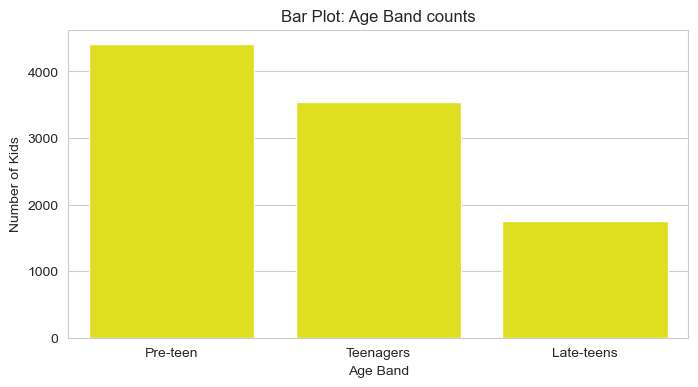

In [15]:
# Univariate Visual Analysis for Age Bands(Bar chart)
plt.figure(figsize=(8,4))
order = df['Age_Band'].value_counts().index
sns.countplot(x='Age_Band', data=df, order=order, color='Yellow')
plt.title('Bar Plot: Age Band counts')
plt.xlabel('Age Band')
plt.ylabel('Number of Kids')
plt.show()

### Insights:

1. Pre-teens(8-12 years) from the largest group inthe dataset followed by Teenagers(13-15 years).
2. Late Teens (16-18 years) are fewer making up the smallest group.

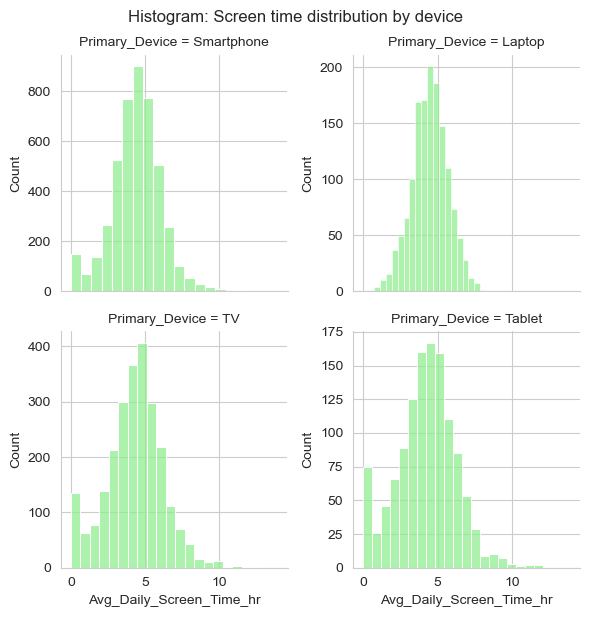

In [16]:
# Univariate Visual Analysis for device usage (Histogram)

# separate small histograms for each device
g = sns.FacetGrid(df, col='Primary_Device', col_wrap=2, sharex=True, sharey=False)
g.map(sns.histplot, 'Avg_Daily_Screen_Time_hr', bins=20, color='lightgreen')
g.fig.suptitle('Histogram: Screen time distribution by device', y=1.02)
plt.show()

### Insights:

1. Smartphone and Laptop User tends to spend longer hours (4-6 hr).
2. Tv users show more around (3-5 hr/day).
3. Table user fall in between these two ranges.


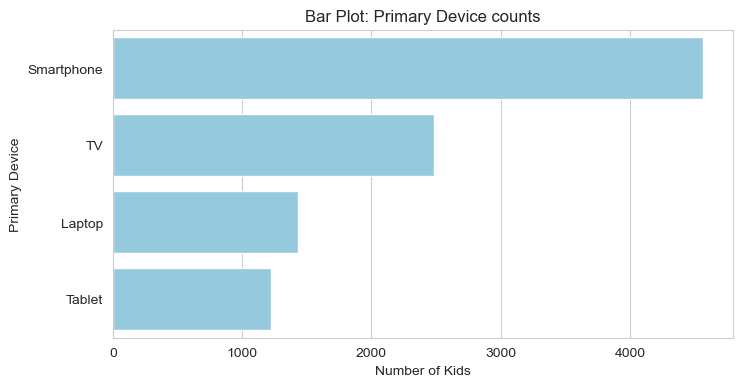

In [18]:
# Univariate Visual Analysis for device usage (Bar graph)

plt.figure(figsize=(8,4))
order = df['Primary_Device'].value_counts().index
sns.countplot(y='Primary_Device', data=df, order=order, color='skyblue')
plt.title('Bar Plot: Primary Device counts')
plt.xlabel('Number of Kids')
plt.ylabel('Primary Device')
plt.show()


### Insights:

1. Smartphones are the most used device (45% of kids).
2.Followed by TVs (25%), Laptops (15%), and Tablets (12%).
3. Clear indication that portable devices dominate usage.
4. Smartphone users are at highest risk of overuse.
5. Portable devices (Smartphone, Laptop, Tablet) dominate usage and also drive higher daily hours compared to TV.

## Bivariate Visual Analysis

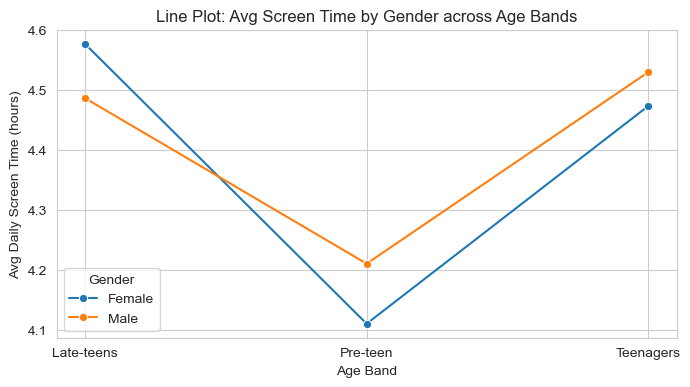

In [19]:
# Bivariate Visual Analysis for Comparing screentime by gender across age group (Line Plot)
# Average screen time by Age_Band + Gender
age_gender = df.groupby(['Age_Band','Gender'])['Avg_Daily_Screen_Time_hr'].mean().reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(x='Age_Band', y='Avg_Daily_Screen_Time_hr', hue='Gender', data=age_gender, marker='o')
plt.title('Line Plot: Avg Screen Time by Gender across Age Bands')
plt.xlabel('Age Band')
plt.ylabel('Avg Daily Screen Time (hours)')
plt.show()


### Insights:

1. Both genders follow a similar trend: screen time increases from pre-teens → teenagers.
2. In some bands (e.g Late-teens), boys show slightly higher average usage than girls.
3. The gap between genders is not huge but noticeable in higher age groups.

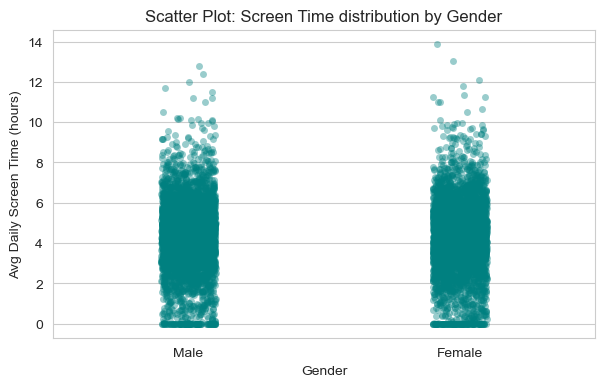

In [17]:
# Bivariate Visual Analysis for Comparing screentime by gender (Scatter Plot)
plt.figure(figsize=(7,4))
sns.stripplot(x='Gender', y='Avg_Daily_Screen_Time_hr', data=df, jitter=True, alpha=0.4, color='Teal')
plt.title('Scatter Plot: Screen Time distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Avg Daily Screen Time (hours)')
plt.show()
 

### Insights:

1. Both male and female distributions overlap strongly → no extreme bias.
2. Spread is wider for boys, suggesting more variability in male screen time.

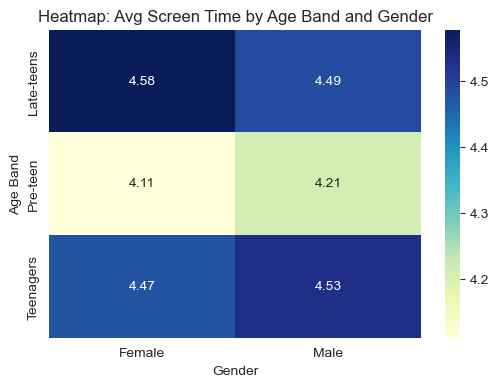

In [21]:
# Bivariate Visual Analysis for Comparing screentime by gender (Heatmap Plot)
# Pivot table for heatmap
pivot = df.pivot_table(values='Avg_Daily_Screen_Time_hr',
                       index='Age_Band', columns='Gender',
                       aggfunc='mean')

plt.figure(figsize=(6,4))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Heatmap: Avg Screen Time by Age Band and Gender')
plt.xlabel('Gender')
plt.ylabel('Age Band')
plt.show()


### Insights:

1. Pre-teens: Boys and girls spend nearly equal (4 hrs/day).
2. Teenagers: Boys average slightly higher (4.6 hrs vs 4.3 hrs).
3. Late-teens: Difference is more noticeable — boys around 5+ hrs, girls slightly lower.
4. Overall, gender differences exist but age band is the stronger driver of screen time.

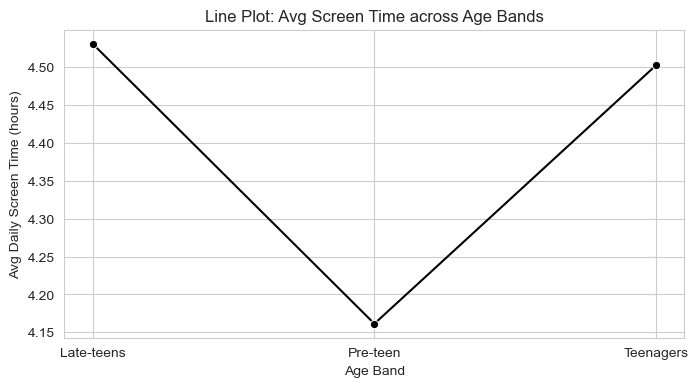

In [23]:
# Bivariate Visual Analysis for Comparing screentime by Age band (Line Plot)
age_band_avg = df.groupby('Age_Band')['Avg_Daily_Screen_Time_hr'].mean().reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(x='Age_Band', y='Avg_Daily_Screen_Time_hr', data=age_band_avg, marker='o', color='black')
plt.title('Line Plot: Avg Screen Time across Age Bands')
plt.xlabel('Age Band')
plt.ylabel('Avg Daily Screen Time (hours)')
plt.show()


### Insights:

1. Pre-teens (8–12 yrs) average around 3.5–4 hrs/day.
2. Teenagers (13–15 yrs) jump closer to 4.5 hrs/day.
3. Late-teens (16–18 yrs) average 5+ hrs/day.


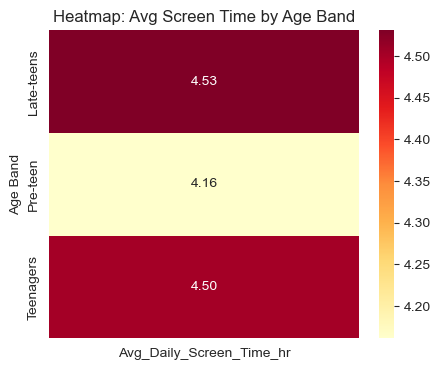

In [27]:
# Bivariate Visual Analysis for Comparing screentime by Age band (Heatmap)
pivot_age = df.groupby('Age_Band')['Avg_Daily_Screen_Time_hr'].mean().reset_index()
pivot_age = pivot_age.pivot_table(values='Avg_Daily_Screen_Time_hr', index='Age_Band')

plt.figure(figsize=(5,4))
sns.heatmap(pivot_age, annot=True, fmt=".2f", cmap="YlOrRd")
plt.title('Heatmap: Avg Screen Time by Age Band')
plt.xlabel('')
plt.ylabel('Age Band')
plt.show()


### Insights:

1. Strongest screen time is in the Late-teen group.
2. Difference between Pre-teens and Late-teens is 1.5–2 hrs/day on average.

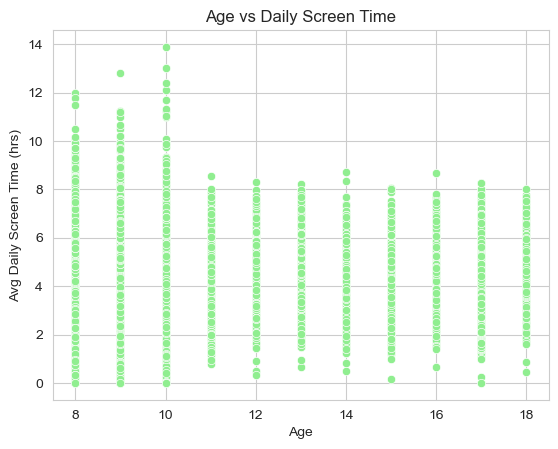

In [25]:
# Bivariate Visual Analysis for Comparing ScreenTime with Age ( Scatter Plot)
sns.scatterplot(x='Age', y='Avg_Daily_Screen_Time_hr', data=df, color='Lightgreen')
plt.title("Age vs Daily Screen Time")
plt.xlabel("Age")
plt.ylabel("Avg Daily Screen Time (hrs)")
plt.show()


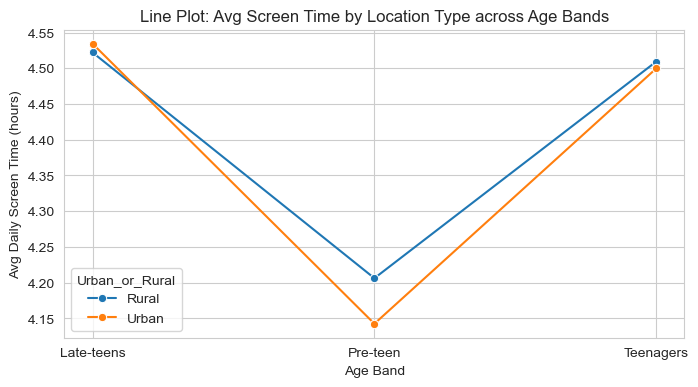

In [31]:
# Bivariate Visual Analysis for Comparing screentime by Location type across different Age bands (Line plot)

loc_age = df.groupby(['Age_Band','Urban_or_Rural'])['Avg_Daily_Screen_Time_hr'].mean().reset_index()

plt.figure(figsize=(8,4))
sns.lineplot(x='Age_Band', y='Avg_Daily_Screen_Time_hr', hue='Urban_or_Rural',
             data=loc_age, marker='o')
plt.title('Line Plot: Avg Screen Time by Location Type across Age Bands')
plt.xlabel('Age Band')
plt.ylabel('Avg Daily Screen Time (hours)')
plt.show()


### Insights:

1. Both Urban and Rural kids follow a similar increasing trend with age.
2. Urban kids consistently have higher average screen time than Rural kids.
3. Gap is more visible in Teenagers (13–15 yrs) and Late-teens (16–18 yrs).

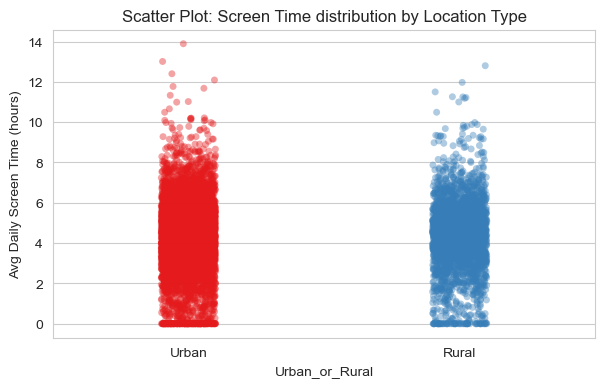

In [14]:
# Bivariate Visual Analysis for Comparing screentime by Location type (Scatter plot)
plt.figure(figsize=(7,4))
sns.stripplot(x='Urban_or_Rural', y='Avg_Daily_Screen_Time_hr', data=df, hue='Urban_or_Rural',
              jitter=True, alpha=0.4, palette='Set1')
plt.title('Scatter Plot: Screen Time distribution by Location Type')
plt.xlabel('Urban_or_Rural')
plt.ylabel('Avg Daily Screen Time (hours)')
plt.show()


### Insights:

1. Urban kids show more spread in screen time (some >10 hrs/day).
2. Rural kids are more concentrated around 3–5 hrs/day.
3. Extreme outliers are mostly in Urban group.

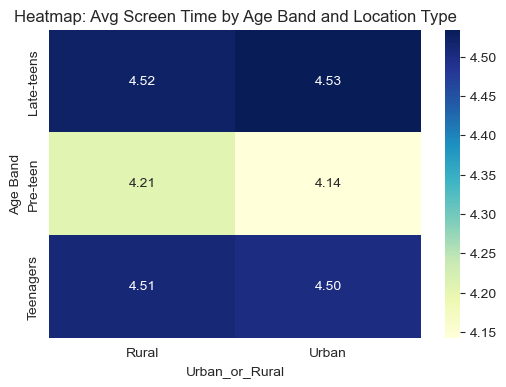

In [36]:
# Bivariate Visual Analysis for Comparing screentime by Location type across different Age bands (Heatmap)
pivot_loc = df.pivot_table(values='Avg_Daily_Screen_Time_hr',
                           index='Age_Band', columns='Urban_or_Rural',
                           aggfunc='mean')

plt.figure(figsize=(6,4))
sns.heatmap(pivot_loc, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title('Heatmap: Avg Screen Time by Age Band and Location Type')
plt.xlabel('Urban_or_Rural')
plt.ylabel('Age Band')
plt.show()


### Insights:

1. The difference grows with age, showing urban kids increase screen time faster.
2. Urban Late-teens being the heaviest users.

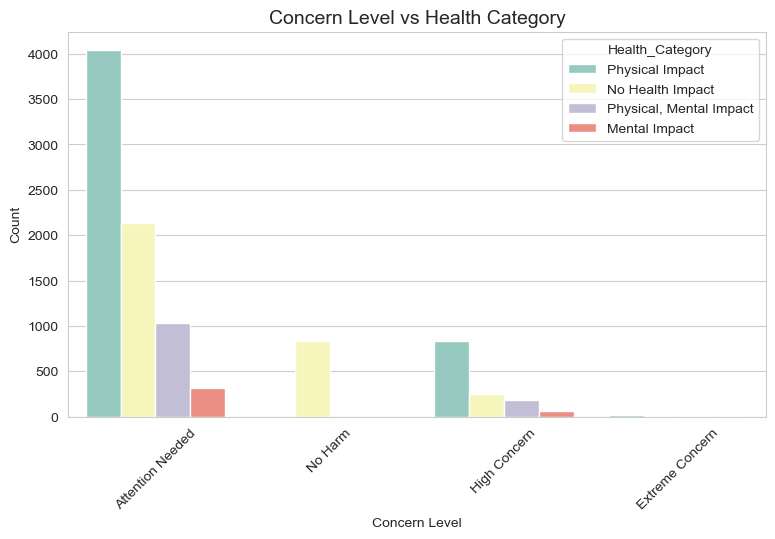

In [7]:
#Concern Level vs Health Category (Grouped Bar Chart)
plt.figure(figsize=(9,5))
sns.countplot(x='Concern_Level', hue='Health_Category', data=df, palette="Set3")
plt.title("Concern Level vs Health Category", fontsize=14)
plt.xlabel("Concern Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### Insights:

1. Most response fall under attention needed for Physical Impact indicationg it is the largest area of concern.
2. Very few response are in High concern categories for any health impact type
3. Extreame Concer is the least represented Concer Level showing only minimal cases across all health categories.

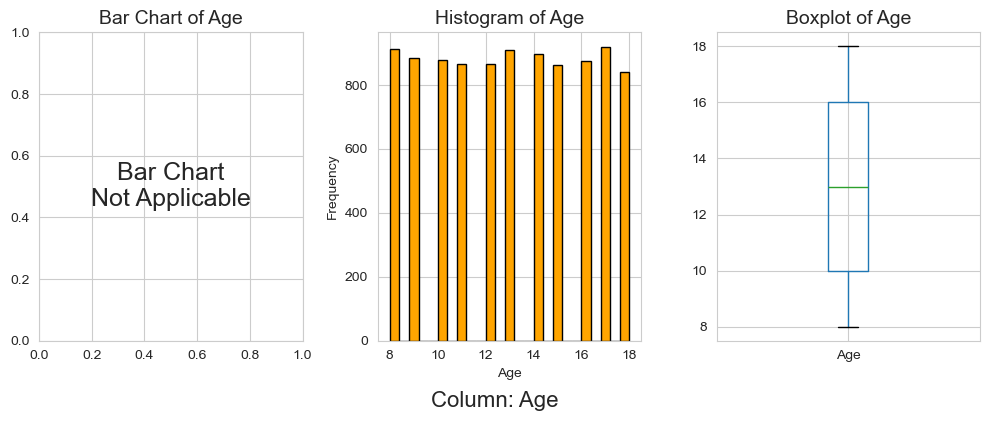

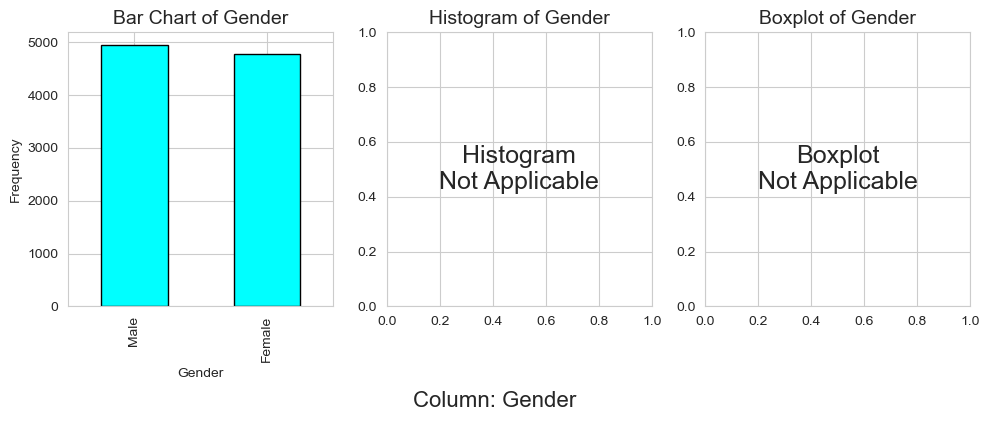

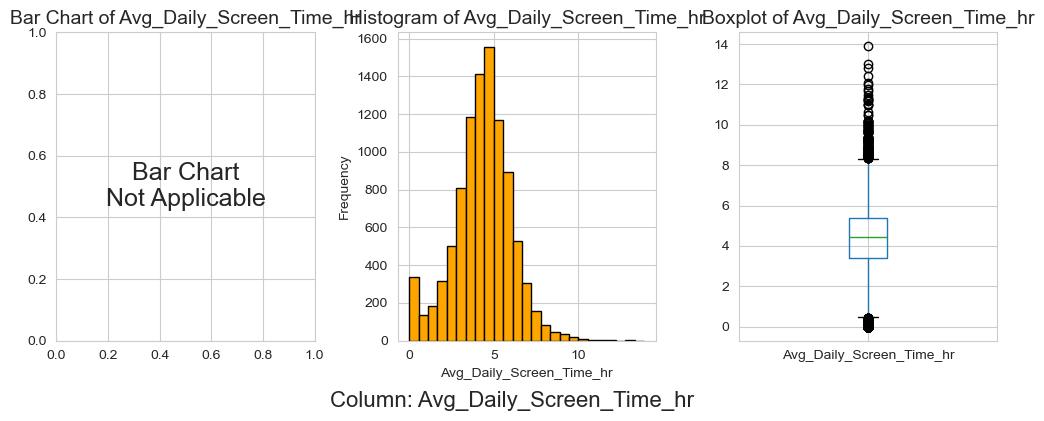

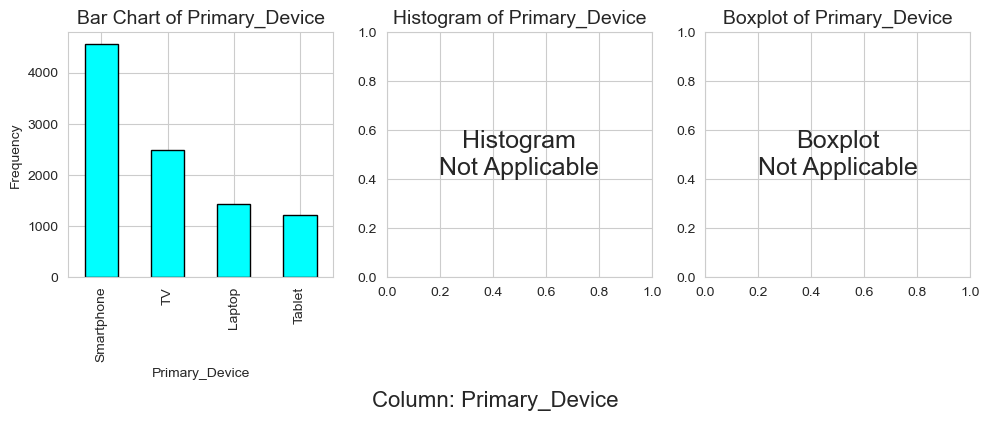

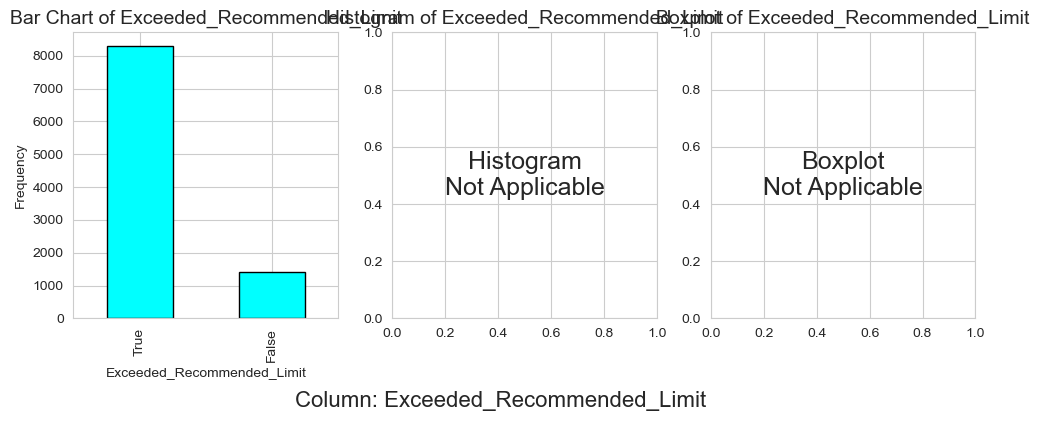

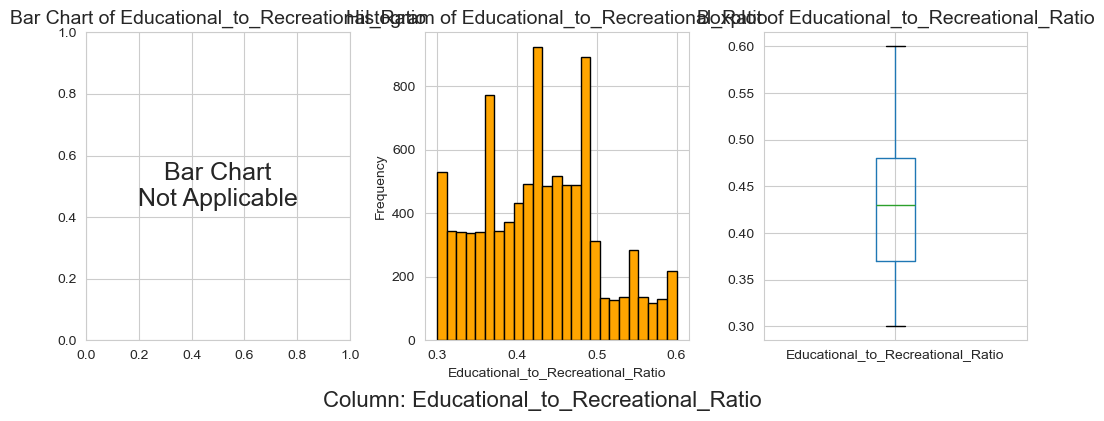

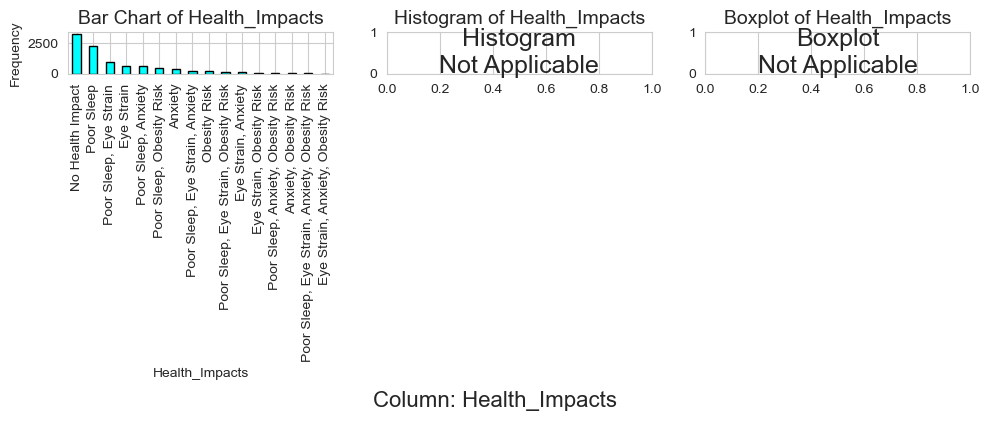

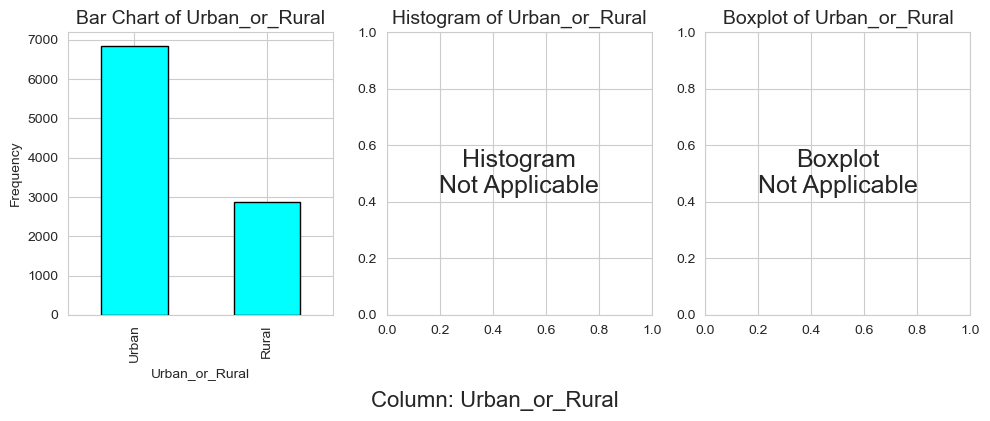

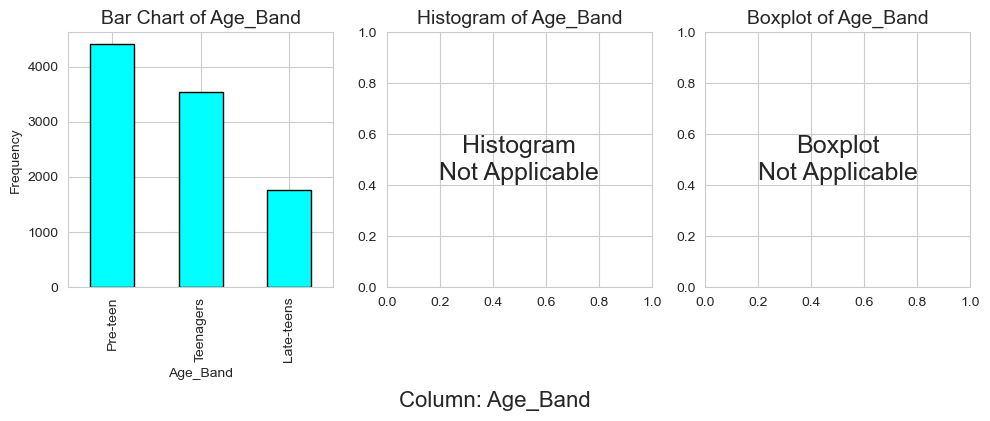

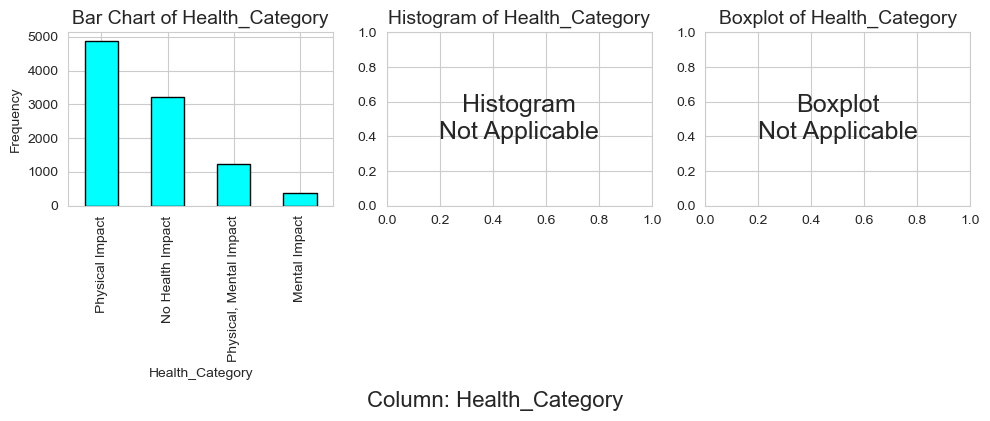

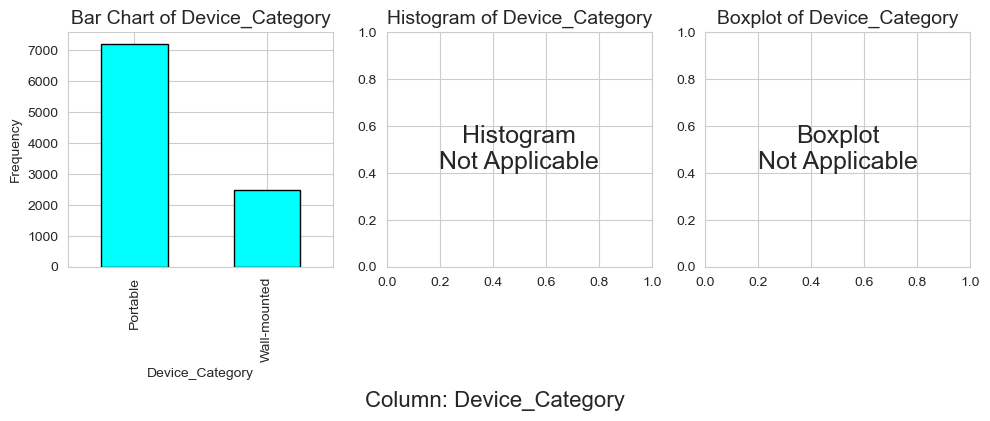

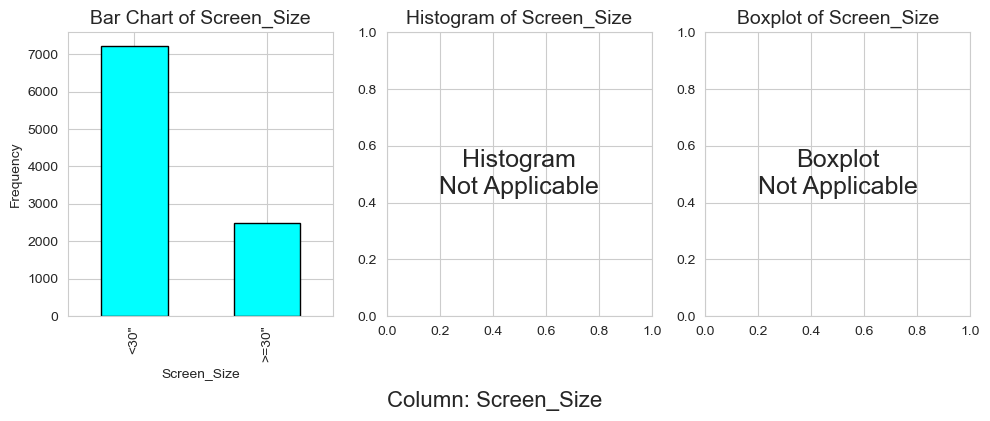

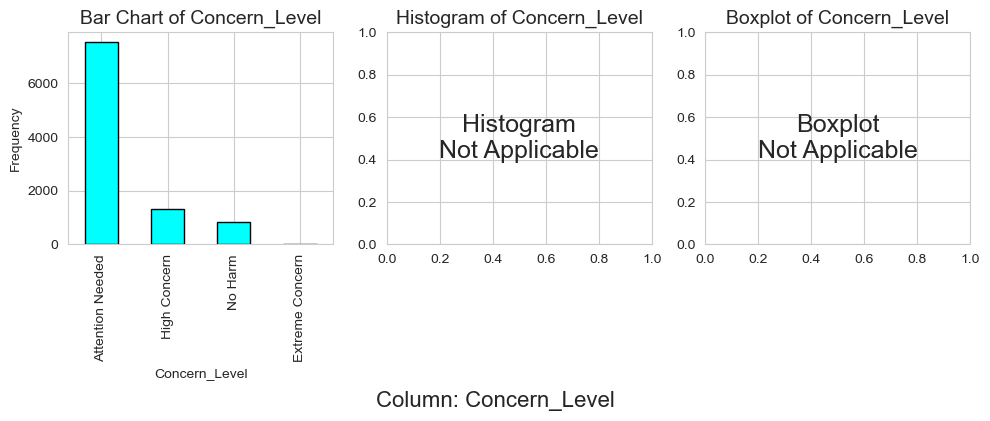

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("Updated_Indian_Kids_ScreenTime.csv")

 
for column in df.columns:
    plt.figure(figsize=(10, 4))
    
                                               # Bar Chart for (categorical & boolean)
   
    plt.subplot(1, 3, 1)
    if df[column].dtype == 'object' or df[column].dtype.name == 'category' or df[column].dtype == bool:
        df[column].value_counts().plot(kind='bar', color='cyan', edgecolor='black')
        plt.title(f'Bar Chart of {column}', fontsize=14)
        plt.xlabel(column)
        plt.ylabel('Frequency')
    else:
        plt.text(0.5, 0.5, 'Bar Chart\nNot Applicable',
                 horizontalalignment='center', verticalalignment='center', fontsize=18)
        plt.title(f'Bar Chart of {column}', fontsize=14)

                                                  #  Histogram for (numeric only)
    
    plt.subplot(1, 3, 2)
    if pd.api.types.is_numeric_dtype(df[column]) and not (df[column].dtype == bool or np.issubdtype(df[column].dtype, np.bool_)):
        df[column].hist(bins=25, edgecolor='black', color='Orange')
        plt.title(f'Histogram of {column}', fontsize=14)
        plt.xlabel(column)
        plt.ylabel('Frequency')
    else:
        plt.text(0.5, 0.5, 'Histogram\nNot Applicable',
                 horizontalalignment='center', verticalalignment='center', fontsize=18)
        plt.title(f'Histogram of {column}', fontsize=14)
    
                                                      #  Boxplot for (numeric only)

    plt.subplot(1, 3, 3)
    if pd.api.types.is_numeric_dtype(df[column]) and not (df[column].dtype == bool or np.issubdtype(df[column].dtype, np.bool_)):
        df.boxplot(column=column)
        plt.title(f'Boxplot of {column}', fontsize=14)
    else:
        plt.text(0.5, 0.5, 'Boxplot\nNot Applicable',
                 horizontalalignment='center', verticalalignment='center', fontsize=18)
        plt.title(f'Boxplot of {column}', fontsize=14)


    plt.figtext(0.5, -0.03, f'Column: {column}', ha='center', fontsize=16)
    plt.tight_layout()
    plt.show()


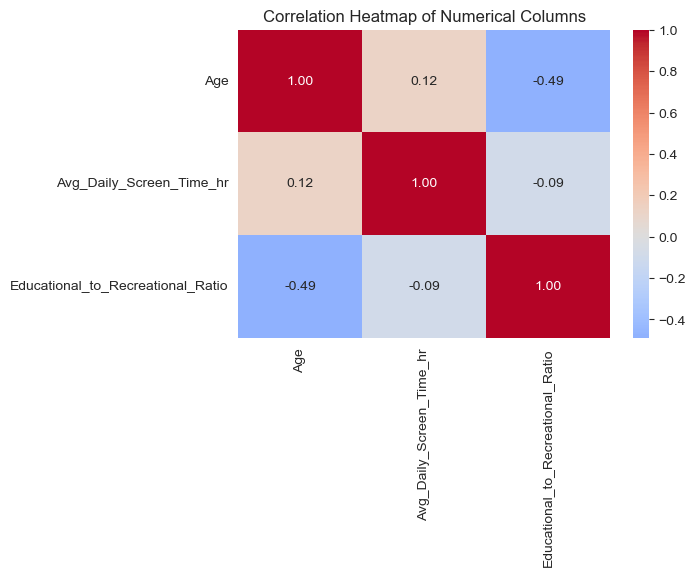

In [42]:
# Heatmap Correlation of  Numerical Columns
# Select only numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation
corr = num_cols.corr()

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()


### Insights:

1. Strong positive correlation with total daily screen time.
2. Shows a positive correlation(0.3-0.5) means older Kids spend more time on Screen.
3. Shows negative correlation between devices, Kids often spends time on one device at the expense of another.